In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300

In [3]:
x = np.array([10, 11, 12, 13, 14])
y = np.array([0, 1, 2, 3, 4])

In [4]:
x + y

array([10, 12, 14, 16, 18])

In [5]:
x - y

array([10, 10, 10, 10, 10])

In [6]:
np.array([[5, 6], [7, 8]]) + np.array([[10, 20], [30, 40]]) - np.array([[1, 2], [3, 4]])

array([[14, 24],
       [34, 44]])

### Inner Product (or dot product)

$ x \cdot y = <x, y> = x^Ty$

In [8]:
x = np.array([[1],[2],[3]])
y = np.array([[4],[5],[6]])

x.T @ y 
# or 
np.dot(x.T, y)

array([[32]])

In [10]:
x = np.array([1,2,3])
y = np.array([4,5,6])

x @ y
# or
np.dot(x, y)

32

## Inner Product가 쓰이는 예시 
### Weighted Sum (가중합)

### 연습 문제 2.2.1¶

A, B, C 세 회사의 주식은 각각 100만원, 80만원, 50만원이다. 이 주식을 각각 3주, 4주, 5주를 매수할 때 필요한 금액을 구하고자 한다.

(1) 주식의 가격과 수량을 각각 p, n 벡터로 표시하고 벡터로 표시하고 넘파이로 코딩한다.

(2) 주식을 매수할 때 필요한 금액을 곱셈으로 표시하고 넘파이 연산으로 그 값을 계산한다.

In [14]:
# (1)
p = np.array([[100], [80], [50]])
n = np.array([[3], [4], [5]])
print(p, '\n', n)

[[100]
 [ 80]
 [ 50]] 
 [[3]
 [4]
 [5]]


In [15]:
# (2)
p.T @ n

array([[870]])

In [16]:
n.T @ p

array([[870]])

In [17]:
np.dot(p.T, n)

array([[870]])

In [20]:
x = np.arange(10)
N = len(x)
np.ones(N).T @ x / N

4.5

In [21]:
np.mean(x)

4.5

In [22]:
type(x)

numpy.ndarray

In [27]:
np.array([x]).T

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

### MNIST data 의 이미지 유사도를 통해 알아보는 cosine similarity (using inner product of the vector)

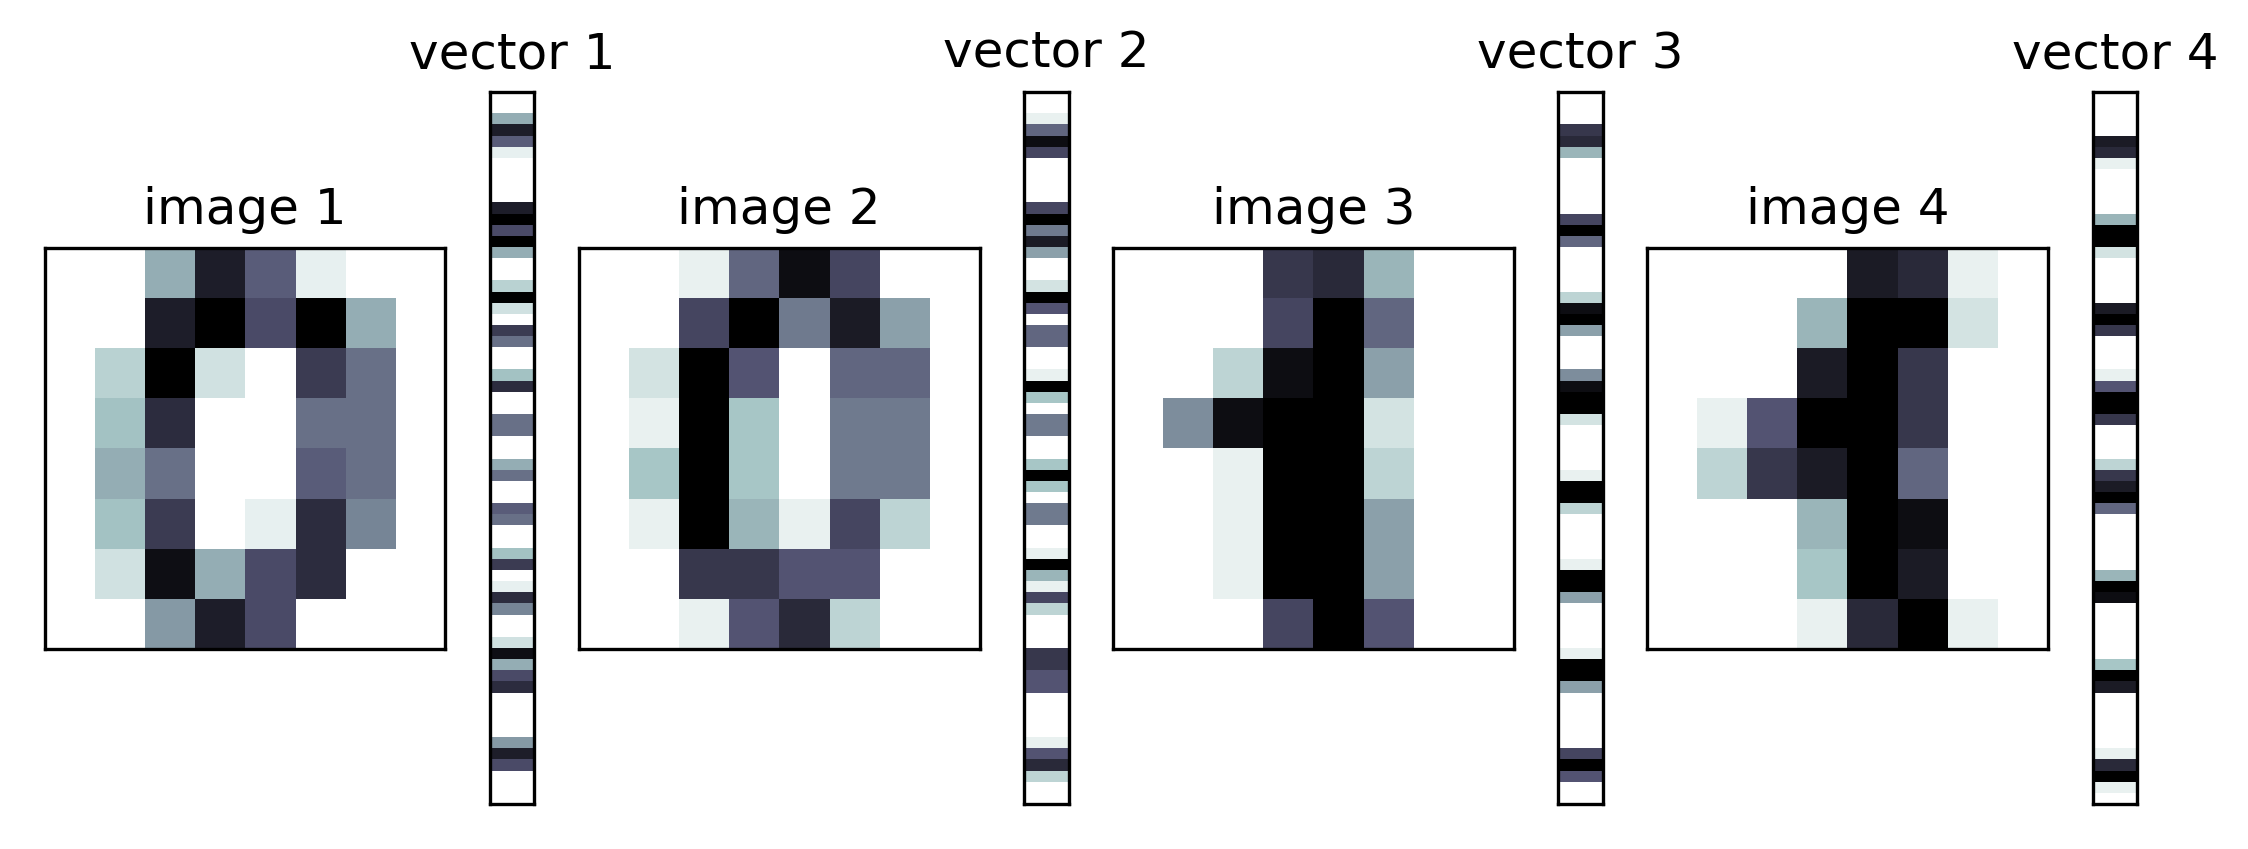

In [43]:
from sklearn.datasets import load_digits
import matplotlib.gridspec as gridspec

digits = load_digits()
digits = load_digits()
d1 = digits.images[0]
d2 = digits.images[10]
d3 = digits.images[1]
d4 = digits.images[11]
v1 = d1.reshape(64, 1) # matrix to vector
v2 = d2.reshape(64, 1)
v3 = d3.reshape(64, 1)
v4 = d4.reshape(64, 1)

fig = plt.figure(figsize=(9,9), constrained_layout=True)
gs = gridspec.GridSpec(1, 8, height_ratios=[1], width_ratios=[9, 1, 9, 1, 9, 1, 9, 1])
for i in range(4):
    globals()["ax" + str(i*2)] = fig.add_subplot(gs[2 * i])
    globals()["ax" + str(i*2)].imshow(globals()["d" + str(i+1)], aspect=1, interpolation='nearest', cmap='bone_r')
    globals()["ax" + str(i*2)].set_title(f"image {i+1}")
    globals()["ax" + str(i*2)].grid(False)
    globals()["ax" + str(i*2)].set_xticks([])
    globals()["ax" + str(i*2)].set_yticks([])
    
    globals()["ax" + str(i*2 + 1)] = fig.add_subplot(gs[(2 * i) + 1])
    globals()["ax" + str(i*2 + 1)].imshow(globals()["v" + str(i+1)], aspect=0.25, interpolation='nearest', cmap='bone_r')
    globals()["ax" + str(i*2 + 1)].set_title(f"vector {i+1}")
    globals()["ax" + str(i*2 + 1)].grid(False)
    globals()["ax" + str(i*2 + 1)].set_xticks([])
    globals()["ax" + str(i*2 + 1)].set_yticks([])

In [44]:
(v1.T @ v2)[0][0], (v3.T @ v4)[0][0]

(3064.0, 3661.0)

In [45]:
(v1.T @ v3)[0][0], (v1.T @ v4)[0][0], (v2.T @ v3)[0][0], (v2.T @ v4)[0][0]

(1866.0, 1883.0, 2421.0, 2479.0)

### 연습문제 2.2.3
(1) 내적을 이용하여 첫 번째 이미지와 10번째 이미지의 유사도를 구하라.

(2) 내적을 이용하여 모든 이미지의 조합에 대해 유사도를 구하라. 어떻게 구현하는 것이 효율적일까? (힌트 : 이 문제는 뒤에서 배울 행렬과 행렬의 곱셈을 이용한다.)

In [50]:
from sklearn.datasets import load_digits
X = load_digits().data
X.shape # 1797개의 이미지를 각각 벡터로 구현 (64-dimensional vector)

(1797, 64)

In [51]:
# (1)
X[0] @ X[9]

2807.0

In [52]:
#(2) 유사도행렬을 만든다
X @ X.T


array([[3070., 1866., 2264., ..., 2812., 3006., 2898.],
       [1866., 4209., 3432., ..., 3906., 3083., 3307.],
       [2264., 3432., 4388., ..., 4005., 3063., 3697.],
       ...,
       [2812., 3906., 4005., ..., 5092., 3729., 4598.],
       [3006., 3083., 3063., ..., 3729., 4316., 3850.],
       [2898., 3307., 3697., ..., 4598., 3850., 4938.]])

### 연습문제 2.2.4

In [53]:
A = np.array([[1, 2, 3], [4, 5, 6]])
B = np.array([[1, 2], [3, 4], [5, 6]])
C = A @ B
C

array([[22, 28],
       [49, 64]])

In [54]:
D = B @ A
D

array([[ 9, 12, 15],
       [19, 26, 33],
       [29, 40, 51]])

In [58]:
A = np.array([[1,2,3]])
B = np.array([[4,7], [5,8], [6,9]])
A @ B

array([[32, 50]])

In [63]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

A @ B == B @ A

array([[False, False],
       [False, False]])

In [66]:
A = np.array([[1, 2], [3, 4], [5, 6]])

A.T @ A

array([[35, 44],
       [44, 56]])

In [67]:
A @ A.T

array([[ 5, 11, 17],
       [11, 25, 39],
       [17, 39, 61]])

In [85]:
x = np.array([1,2,3]).reshape(3,1)
x.T @ x # inner product
x @ x.T # 3x3 square matrix 

array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])

### 연습문제 2.2.5 (4)

In [98]:
from sklearn.datasets import load_iris
X = load_iris().data
X.shape


(150, 4)

$ \bar{X} = \dfrac{1}{N} 1_{N} 1_{N}^T X $

In [100]:
N = X.shape[0]
n1 = np.ones((N,1))
n1.shape
(n1 @ n1.T).shape

#1/N * np.ones((,1))

(150, 150)

In [106]:
Xbar = (1/N) * n1 @ n1.T @ X
Xbar.shape

(150, 4)

In [110]:
A = np.array([[1, 2], [3, 4]])
I = np.eye(2) # or np.identity(2)

In [111]:
A @ I

array([[1., 2.],
       [3., 4.]])

In [112]:
I @ A

array([[1., 2.],
       [3., 4.]])

Text(0.5, 1.0, 'image 3: $0.7x_1 + 0.3x_2$')

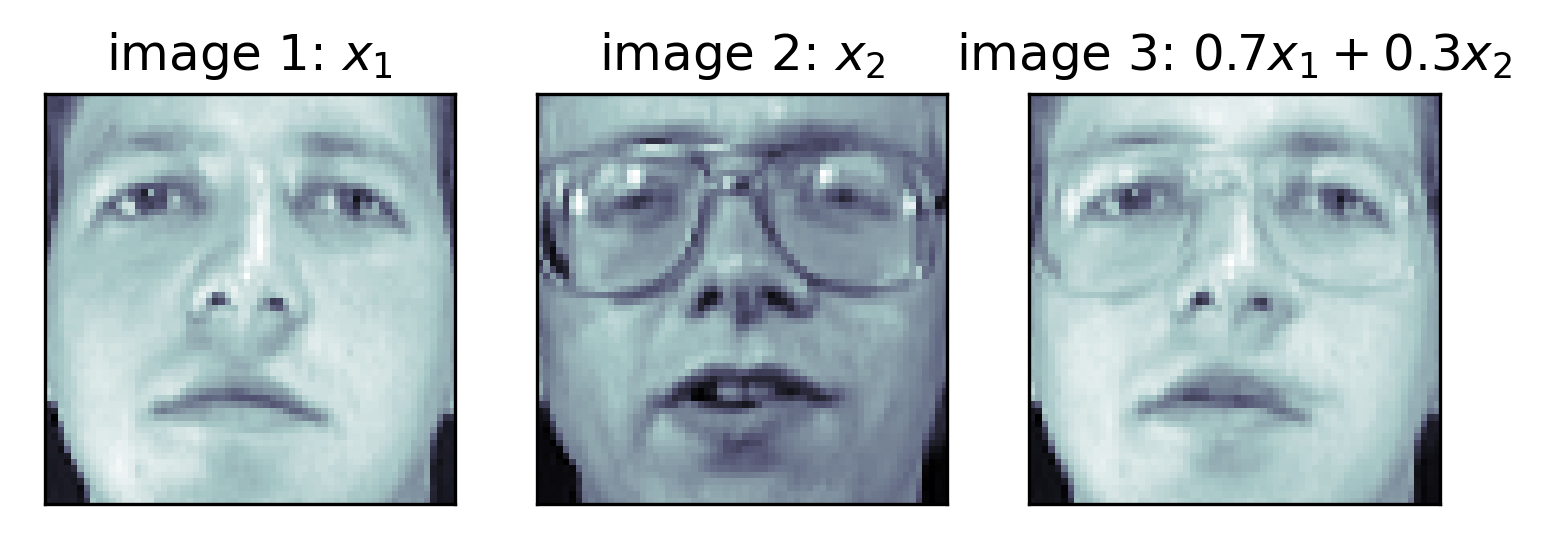

In [123]:
# Morphing (두 이미지 섞기) : Linear combination

from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces() # faces.images[index] : (64, 64)의 matrix

fig, axes = plt.subplots(1, 3)

axes[0].imshow(faces.images[6], cmap='bone')
axes[0].grid(False)
axes[0].set_xticks([])
axes[0].set_yticks([])
axes[0].set_title("image 1: $x_1$")

axes[1].imshow(faces.images[10], cmap='bone')
axes[1].grid(False)
axes[1].set_xticks([])
axes[1].set_yticks([])
axes[1].set_title("image 2: $x_2$")

new_face = 0.7 * faces.images[6] + 0.3 * faces.images[10]
axes[2].imshow(new_face, cmap='bone')
axes[2].grid(False)
axes[2].set_xticks([])
axes[2].set_yticks([])
axes[2].set_title("image 3: $0.7x_1 + 0.3x_2$")